In [1]:
import os
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import detect_craters_with_model

Using TensorFlow backend.
/home/grosman/DLM-Project/deep_crater_env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/grosman/DLM-Project/deep_crater_env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/grosman/DLM-Project/deep_crater_env/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
model_path = '../../data/trained_model/Silburt/model_keras1.2.2.h5'
#model_path = '../../data/trained_model/Silburt/model_keras2.h5'
model = load_model(model_path)



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [44]:
import numpy as np
data_path = '../../data/model_input_images/test_coordinates_108_126_12_24/'
all_craters = pd.read_csv('{}craters_table.csv'.format(data_path)).round(6).sort_values(by=['Diameter (km)'])
craters_num = len(all_craters)
all_folders = [x[0] for x in os.walk(data_path)][1:]
folders_num = len(all_folders)
mat = np.zeros((craters_num, folders_num))
for i in range(folders_num):
    f = all_folders[i]
    print(f)
    arr = detect_craters_with_model.get_detected_craters_from_path(all_craters, f, model)
    mat[:,i] = arr

../../data/model_input_images/test_coordinates_108_126_12_24/ws_2000_ol_400
../../data/model_input_images/test_coordinates_108_126_12_24/ws_500_ol_100
../../data/model_input_images/test_coordinates_108_126_12_24/ws_1000_ol_200
../../data/model_input_images/test_coordinates_108_126_12_24/ws_3072_ol_600


In [43]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(1,10))
# plt.imshow(mat[:,[3,2,0,1]])

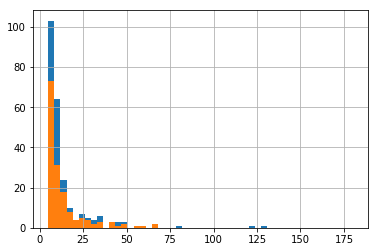

In [42]:
all_craters.loc[:,'Diameter (km)'].hist(range=(5,180),bins=50)
all_craters.loc[arr,'Diameter (km)'].hist(range=(5,180),bins=50)

In [37]:
data_path = '../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/'
all_craters = pd.read_csv('{}craters_table.csv'.format(data_path)).round(6).sort_values(by=['Diameter (km)'])
craters_num = len(all_craters)
all_folders = [x[0] for x in os.walk(data_path)][1:]
folders_num = len(all_folders)
mat_SLDEM_before = np.zeros((craters_num, folders_num))
for i in range(folders_num):
    f = all_folders[i]
    print(f)
    arr = detect_craters_with_model.get_detected_craters_from_path(all_craters, f, model)
    mat_SLDEM_before[:,i] = arr

../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/ws_2000_ol_400
../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/ws_4000_ol_800
../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/ws_6144_ol_1200
../../data/model_input_images/test_SLDEM_compression_before2_coordinates_108_126_12_24/ws_1000_ol_200


In [38]:
data_path = '../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/'
all_craters = pd.read_csv('{}craters_table.csv'.format(data_path)).round(6).sort_values(by=['Diameter (km)'])
craters_num = len(all_craters)
all_folders = [x[0] for x in os.walk(data_path)][1:]
folders_num = len(all_folders)
mat_SLDEM_after = np.zeros((craters_num, folders_num))
for i in range(folders_num):
    f = all_folders[i]
    print(f)
    arr = detect_craters_with_model.get_detected_craters_from_path(all_craters, f, model)
    mat_SLDEM_after[:,i] = arr

../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/ws_2000_ol_400
../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/ws_4000_ol_800
../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/ws_6144_ol_1200
../../data/model_input_images/test_SLDEM_compression_after_coordinates_108_126_12_24/ws_1000_ol_200


In [90]:
print('RECALL:')
print('window size (km)    : {}'.format(np.array([500,1000,2000,3072])*120/1000))
print('for 120 m/pix, 8-bit: {} | over all: {}'.format(mat[:,[1,2,0,3]].mean(axis=0),mat.any(axis=1).mean()))  #(2000,500,1000,3072)
print('for 60 m/pix, before: {} | over all: {}'.format(mat_SLDEM_before[:,[3,0,1,2]].mean(axis=0),mat_SLDEM_before.any(axis=1).mean())) #(2000,4000,6144,1000)
print('for 60 m/pix, after: {} | over all: {}'.format(mat_SLDEM_after[:,[3,0,1,2]].mean(axis=0),mat_SLDEM_after.any(axis=1).mean()))

RECALL:
window size (km)    : [ 60.   120.   240.   368.64]
for 120 m/pix, 8-bit: [0.54508197 0.68852459 0.79098361 0.57377049] | over all: 0.8811475409836066
for 60 m/pix, before: [0.61885246 0.7704918  0.79508197 0.5942623 ] | over all: 0.8852459016393442
for 60 m/pix, after: [0.64754098 0.79098361 0.81557377 0.59016393] | over all: 0.9016393442622951


In [1]:
mat.any(axis=1).mean()
mat_SLDEM_before.any(axis=1).mean()
mat_SLDEM_after.any(axis=1).mean()

NameError: name 'mat' is not defined

In [2]:
mat_SLDEM_after

NameError: name 'mat_SLDEM_after' is not defined